In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import seaborn as sns

In [2]:
peak_folder = '/Users/emiliebertholet/cernbox/coldbox_data/selected_waveforms'

with open(f'{peak_folder}/selection_cosmics_wlenNone_prom500.pkl', 'rb') as file:
    dic = pickle.load(file)
cosmics = pd.DataFrame(dic)
print(f"cosmics:  {cosmics.shape[0]} peaks, {cosmics.trigger_record.unique().shape[0]} trigger records")

with open(f'{peak_folder}/selection_PNS_wlenNone_prom500.pkl', 'rb') as file:
    dic = pickle.load(file)
PNS = pd.DataFrame(dic)
print(f"PNS:  {PNS.shape[0]} peaks, {PNS.trigger_record.unique().shape[0]} trigger records")

with open(f'{peak_folder}/selection_PNS_neutrons_wlenNone_prom500.pkl', 'rb') as file:
    dic = pickle.load(file)
PNS_neutrons = pd.DataFrame(dic)
print(f"PNS_neutrons:  {PNS_neutrons.shape[0]} peaks, {PNS_neutrons.trigger_record.unique().shape[0]} trigger records")

with open(f'{peak_folder}/selection_PNS_SideBand_wlenNone_prom500.pkl', 'rb') as file:
    dic = pickle.load(file)
PNS_SB = pd.DataFrame(dic)
print(f"PNS_SB:  {PNS_SB.shape[0]} peaks, {PNS_SB.trigger_record.unique().shape[0]} trigger records")


# cosmics, 25150 peaks, 4189 trigger records
# PNS, 46228 peaks, 14283 trigger records
# PNS_neutrons, 3780 peaks, 3187 trigger records
# PNS_SB, 39102 peaks, 13893 trigger records



# cosmics.keys()

cosmics:  25150 peaks, 4189 trigger records
PNS:  46228 peaks, 14283 trigger records
PNS_neutrons:  3780 peaks, 3187 trigger records
PNS_SB:  39102 peaks, 13893 trigger records


In [3]:
def pad_waveforms(input_data, pad_length=500):
    output_data = input_data
    output_data['waveform_padded'] = [np.pad(wf, (0, pad_length - len(wf))) if len(wf) < pad_length else wf[:pad_length] for wf in output_data['waveform']]
    return output_data

cosmics      = pad_waveforms(cosmics, 500)
PNS          = pad_waveforms(PNS, 500)
PNS_neutrons = pad_waveforms(PNS_neutrons, 500)
PNS_SB       = pad_waveforms(PNS_SB, 500)

In [4]:
def promptFrac(waveform, promptLim, Start=0):
    ratio, TotalIntegral, promptInt = [], [], []
    tot_int = np.sum(waveform[Start:])
    pf = np.sum(waveform[Start:promptLim])

    ratio =  pf/tot_int 
    TotalIntegral = tot_int 
    promptInt =  pf
    return ratio, TotalIntegral, promptInt

In [5]:
mu_avg = np.mean(cosmics['waveform_padded'], axis=0)
n_avg  = np.mean(PNS_neutrons['waveform_padded'], axis=0)
sb_avg = np.mean(PNS_SB['waveform_padded'], axis=0)
pns_avg = np.mean(PNS['waveform_padded'], axis=0)

mu:  pF = 0.745, totInt = 145366.9, prompt = 108250.5
n:   pF = 0.734, totInt = 130485.2, prompt = 95748.4
sb:  pF = 0.750, totInt = 134013.9, prompt = 100452.8
pns: pF = 0.748, totInt = 133393.5, prompt = 99745.3


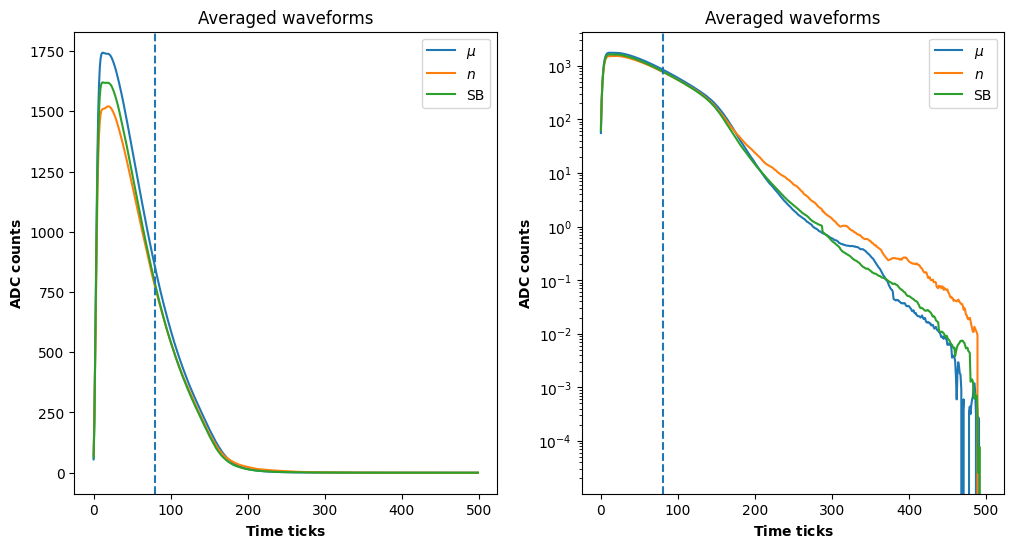

In [6]:
promptLim = 80

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
ax = axs.flatten()[0]
ax.plot(mu_avg.transpose(), label = r'$\mu$') 
ax.plot(n_avg.transpose(), label = r'$n$') 
ax.plot(sb_avg.transpose(), label = r'SB')
# ax.plot(sb_avg.transpose(), label = r'PNS') 
ax.axvline(x = promptLim, linestyle='--')
ax.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
ax.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");
ax.set_title(r"Averaged waveforms");
ax.legend();

ax = axs.flatten()[1]
ax.plot(mu_avg.transpose(), label = r'$\mu$') 
ax.plot(n_avg.transpose(), label = r'$n$') 
ax.plot(sb_avg.transpose(), label = r'SB')
# ax.plot(sb_avg.transpose(), label = r'PNS') 
ax.axvline(x = promptLim, linestyle='--')
ax.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
ax.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");
ax.set_title(r"Averaged waveforms");
ax.set_yscale('log')
ax.legend();

mu_pF, mu_totI, mu_promptI = promptFrac(mu_avg, promptLim, Start=0)
n_pF, n_totI, n_promptI = promptFrac(n_avg, promptLim, Start=0)
sb_pF, sb_totI, sb_promptI = promptFrac(sb_avg, promptLim, Start=0)
pns_pF, pns_totI, pns_promptI = promptFrac(pns_avg, promptLim, Start=0)

print(f'mu:  pF = {mu_pF:.3f}, totInt = {mu_totI:.1f}, prompt = {mu_promptI:.1f}')
print(f'n:   pF = {n_pF:.3f}, totInt = {n_totI:.1f}, prompt = {n_promptI:.1f}')
print(f'sb:  pF = {sb_pF:.3f}, totInt = {sb_totI:.1f}, prompt = {sb_promptI:.1f}')
print(f'pns: pF = {pns_pF:.3f}, totInt = {pns_totI:.1f}, prompt = {pns_promptI:.1f}');

# Play with window size of the prompt

In [7]:
mu, n = {'pF': [], 'totI': [], 'promptI': [], 'limit': []}, {'pF': [], 'totI': [], 'promptI': [], 'limit': []}
sb, pns = {'pF': [], 'totI': [], 'promptI': [], 'limit': []}, {'pF': [], 'totI': [], 'promptI': [], 'limit': []}
for promptLim in np.arange(0, 200, 1):
    mu_pF, mu_totI, mu_promptI = promptFrac(mu_avg, promptLim, Start=0)
    n_pF, n_totI, n_promptI = promptFrac(n_avg, promptLim, Start=0)
    sb_pF, sb_totI, sb_promptI = promptFrac(sb_avg, promptLim, Start=0)
    pns_pF, pns_totI, pns_promptI = promptFrac(pns_avg, promptLim, Start=0)

    mu['pF'].append(mu_pF)
    mu['totI'].append(mu_totI)
    mu['promptI'].append(mu_promptI)
    mu['limit'].append(promptLim)

    n['pF'].append(n_pF)
    n['totI'].append(n_totI)
    n['promptI'].append(n_promptI)
    n['limit'].append(promptLim)

    sb['pF'].append(sb_pF)
    sb['totI'].append(sb_totI)
    sb['promptI'].append(sb_promptI)
    sb['limit'].append(promptLim)

    pns['pF'].append(pns_pF)
    pns['totI'].append(pns_totI)
    pns['promptI'].append(pns_promptI)
    pns['limit'].append(promptLim)


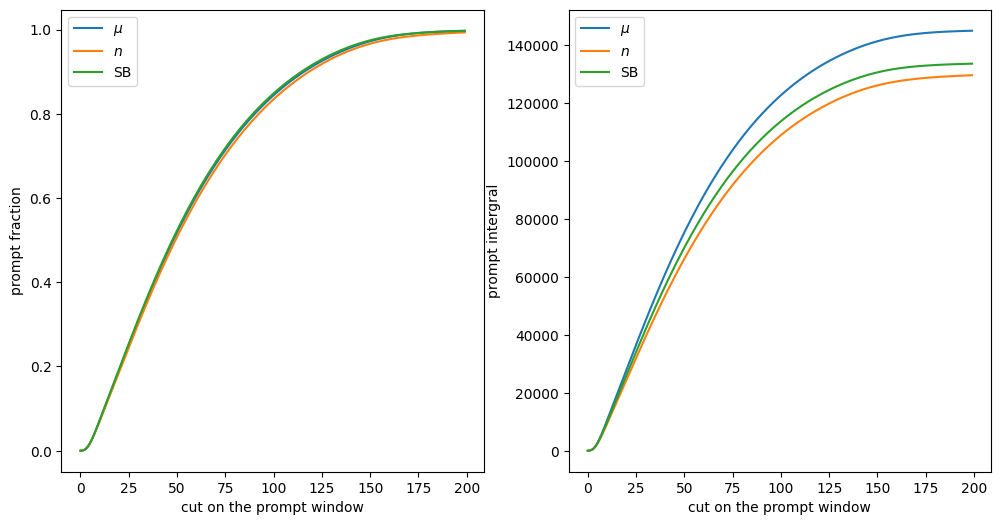

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
i = 0
for var in ['pF', 'promptI']:
    ax = axs.flatten()[i]
    ax.plot(mu['limit'],    mu[var], label = r'$\mu$') 
    ax.plot(n['limit'],      n[var], label = r'$n$') 
    ax.plot(sb['limit'],    sb[var], label = r'SB')
    # ax.plot(pns['limit'],  pns[var], label = r'PNS') 
    ax.set_xlabel(r"cut on the prompt window")
    if var=='pF': ax.set_ylabel(r"prompt fraction");
    if var=='promptI': ax.set_ylabel(r"prompt intergral");
    # ax.set_xscale('log')
    # ax.set_xlim(25, 125);
    ax.legend();
    i+=1

# Play with peak height selection

In [13]:
thresholds = np.arange(0, 13000, 50)

promptLim = 50

mu, n = {'pF': [], 'totI': [], 'promptI': [], 'threshold': []}, {'pF': [], 'totI': [], 'promptI': [], 'threshold': []}
sb, pns = {'pF': [], 'totI': [], 'promptI': [], 'threshold': []}, {'pF': [], 'totI': [], 'promptI': [], 'threshold': []}

for threshold in thresholds:
    mu_avg = np.mean(cosmics.query(f'height>{threshold}')['waveform_padded'], axis=0)
    n_avg = np.mean(PNS_neutrons.query(f'height>{threshold}')['waveform_padded'], axis=0)
    sb_avg = np.mean(PNS_SB.query(f'height>{threshold}')['waveform_padded'], axis=0)

    mu_pF, mu_totI, mu_promptI = promptFrac(mu_avg, promptLim, Start=0)
    n_pF, n_totI, n_promptI = promptFrac(n_avg, promptLim, Start=0)
    sb_pF, sb_totI, sb_promptI = promptFrac(sb_avg, promptLim, Start=0)
    # pns_pF, pns_totI, pns_promptI = promptFrac(pns_avg, promptLim, Start=0)

    mu['pF'].append(mu_pF)
    mu['totI'].append(mu_totI)
    mu['promptI'].append(mu_promptI)
    mu['threshold'].append(threshold)

    n['pF'].append(n_pF)
    n['totI'].append(n_totI)
    n['promptI'].append(n_promptI)
    n['threshold'].append(threshold)

    sb['pF'].append(sb_pF)
    sb['totI'].append(sb_totI)
    sb['promptI'].append(sb_promptI)
    sb['threshold'].append(threshold)

    pns['pF'].append(pns_pF)
    pns['totI'].append(pns_totI)
    pns['promptI'].append(pns_promptI)
    pns['threshold'].append(threshold)

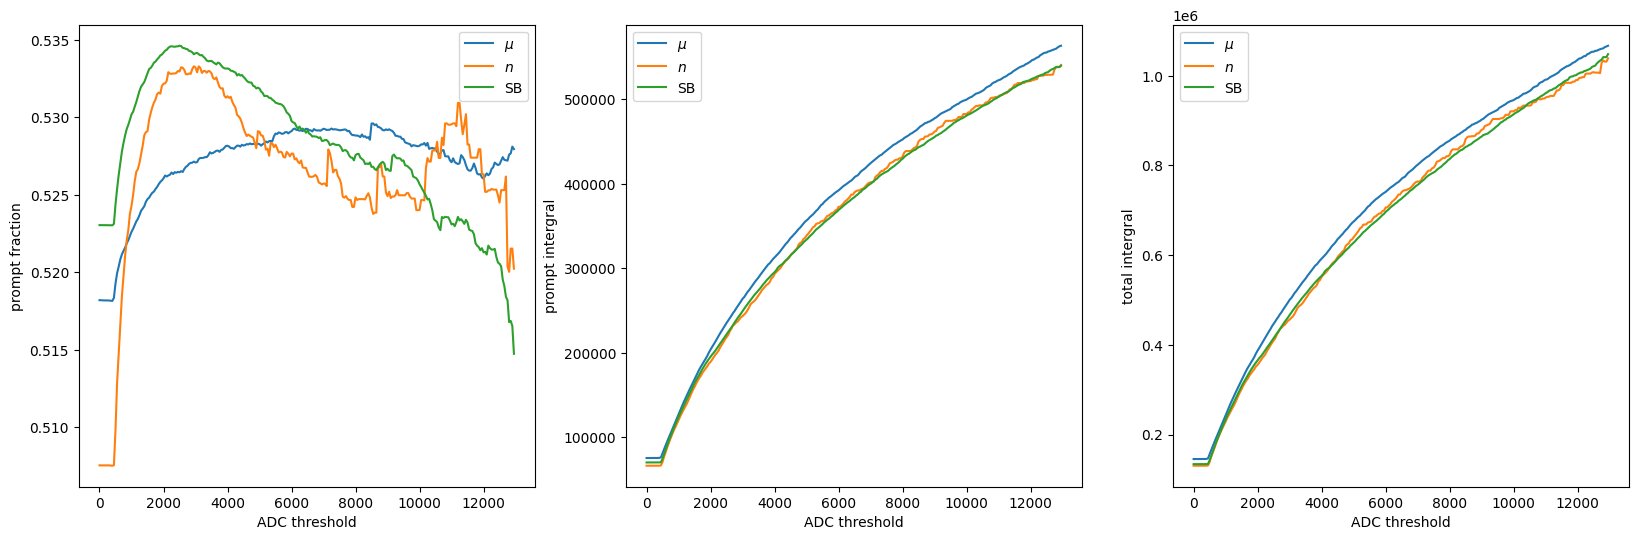

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
i = 0
for var in ['pF', 'promptI', 'totI']:
    ax = axs.flatten()[i]
    ax.plot(mu['threshold'],    mu[var], label = r'$\mu$') 
    ax.plot(n['threshold'],      n[var], label = r'$n$') 
    ax.plot(sb['threshold'],    sb[var], label = r'SB')
    # ax.plot(pns['threshold'],  pns[var], label = r'PNS') 
    ax.set_xlabel(r"ADC threshold")
    if var=='pF': ax.set_ylabel(r"prompt fraction");
    if var=='promptI': ax.set_ylabel(r"prompt intergral");
    if var=='totI': ax.set_ylabel(r"total intergral");
    ax.legend();
    i+=1

# Play with overall quality of wavefoms

In [23]:
from scipy.signal import find_peaks

# --- Function to compute DPR ---
def dominant_peak_ratio(wf, prominence=0.1):
    peaks, _ = find_peaks(wf, prominence=prominence)
    if len(peaks) == 0:
        return 0.0
    heights = wf[peaks]
    return np.max(heights) / np.sum(heights)

cosmics['peak_ratio']      = cosmics['waveform'].apply(dominant_peak_ratio)
PNS['peak_ratio']          = PNS['waveform'].apply(dominant_peak_ratio)
PNS_neutrons['peak_ratio'] = PNS_neutrons['waveform'].apply(dominant_peak_ratio)
PNS_SB['peak_ratio']       = PNS_SB['waveform'].apply(dominant_peak_ratio)

In [ ]:
cosmics.head()

,trigger_record,waveform_index,height,width,pedestal,waveform,waveform_padded,peak_ratio
0,0,0,419,195.350000,1303,"[-92, -84, -75, -84, -85, -77, -69, -66, -51, ...","[-92, -84, -75, -84, -85, -77, -69, -66, -51, ...",0.048133
1,0,1,1148,166.122199,1303,"[-2, 41, 161, 322, 488, 619, 738, 806, 859, 88...","[-2, 41, 161, 322, 488, 619, 738, 806, 859, 88...",0.103034
2,0,2,2252,192.744797,1303,"[89, 391, 788, 1155, 1487, 1780, 1994, 2125, 2...","[89, 391, 788, 1155, 1487, 1780, 1994, 2125, 2...",0.146035
3,0,3,462,169.719328,1303,"[-44, -27, 5, 94, 176, 242, 294, 337, 364, 388...","[-44, -27, 5, 94, 176, 242, 294, 337, 364, 388...",0.089241
4,0,4,558,146.478022,1303,"[-30, -16, 10, 65, 151, 252, 340, 374, 401, 47...","[-30, -16, 10, 65, 151, 252, 340, 374, 401, 47...",0.078691


In [42]:
def plot_peak_ratios(sample, peak_ratio, sample_name=''):
    fig, axs = plt.subplots(1, 3, figsize=(20, 6))

    ax = axs.flatten()[0]
    waveforms = np.stack(sample['waveform_padded'].values)
    avg = np.mean(sample['waveform_padded'], axis=0)
    for w in waveforms[:1000]:
        ax.plot(w, alpha=0.5)
    ax.plot(avg, color='black', linewidth=2, label='Average')
    ax.set_title(sample_name)
    ax.legend();

    ax = axs.flatten()[1]
    df = sample.query(f'peak_ratio>{peak_ratio}')
    waveforms = np.stack(df['waveform_padded'].values)
    avg = np.mean(df['waveform_padded'], axis=0)
    for w in waveforms[:1000]:
        ax.plot(w, alpha=0.5)
    ax.plot(avg, color='black', linewidth=2, label='Average')
    ax.set_title(f'{sample_name} peak ratio > {peak_ratio}')
    ax.legend();

    ax = axs.flatten()[2]
    df = sample.query(f'peak_ratio<{peak_ratio}')
    waveforms = np.stack(df['waveform_padded'].values)
    avg = np.mean(df['waveform_padded'], axis=0)
    for w in waveforms[:1000]:
        ax.plot(w, alpha=0.5)
    ax.plot(avg, color='black', linewidth=2, label='Average')
    ax.set_title(f'{sample_name} peak ratio < {peak_ratio}')
    ax.legend();


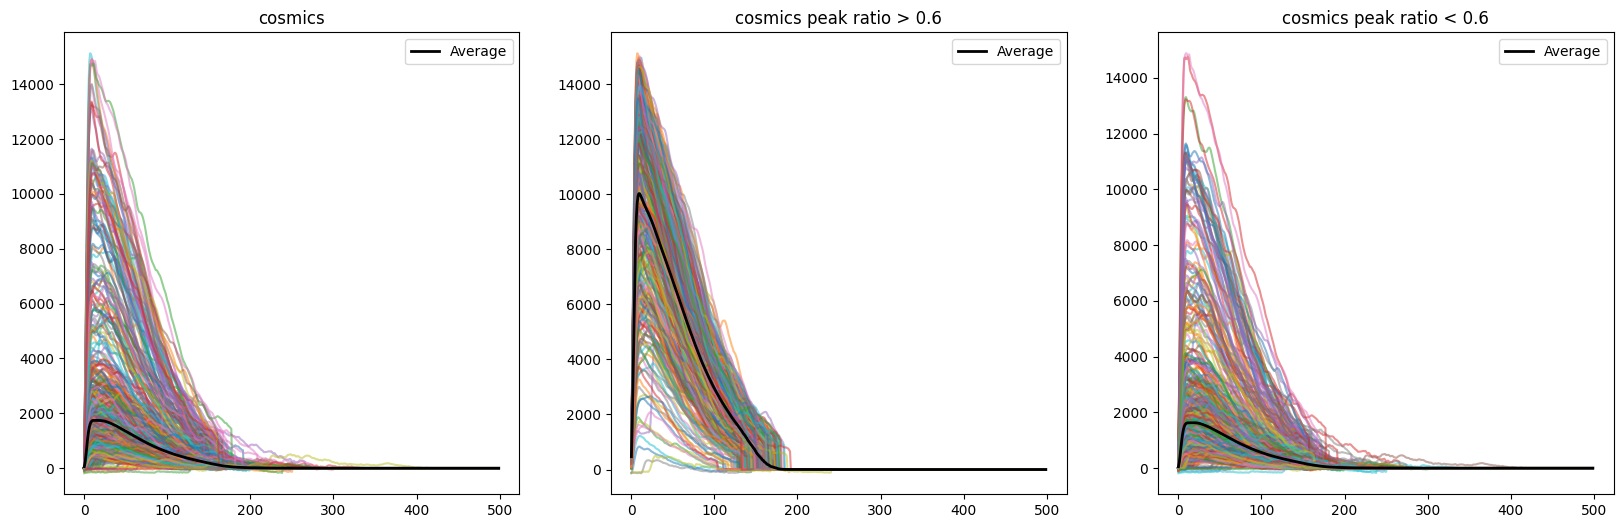

In [43]:
plot_peak_ratios(cosmics, peak_ratio=0.6, sample_name='cosmics')

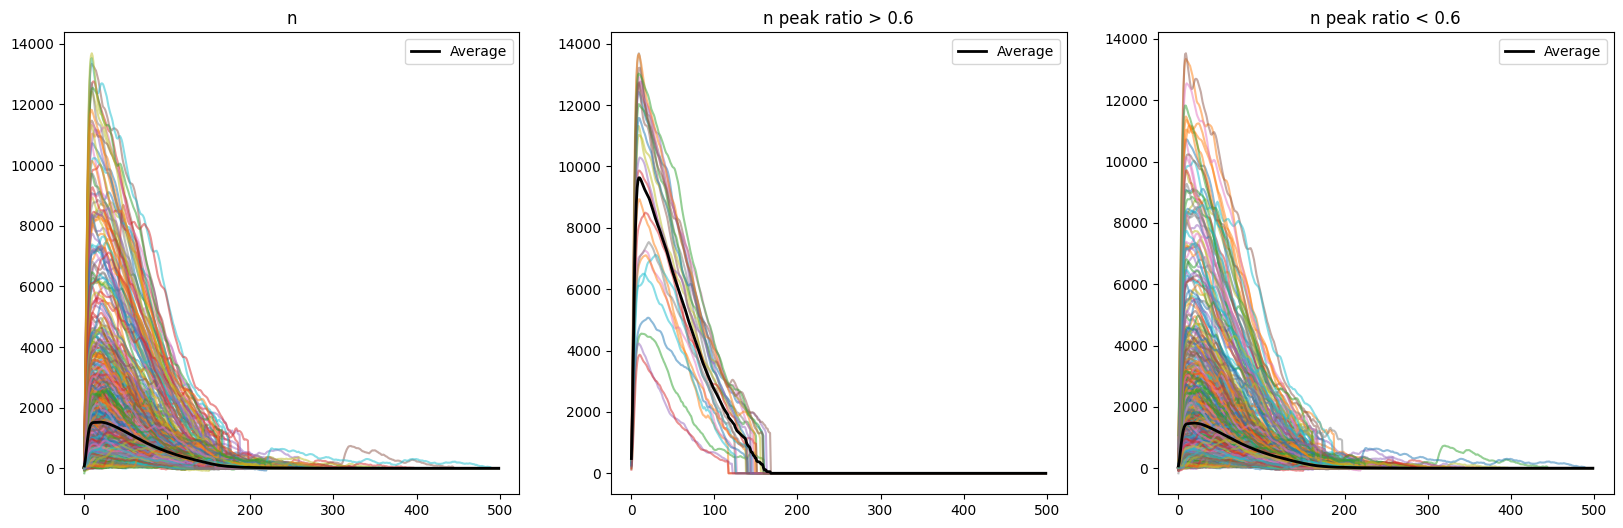

In [46]:
plot_peak_ratios(PNS_neutrons, peak_ratio=0.6, sample_name='n')

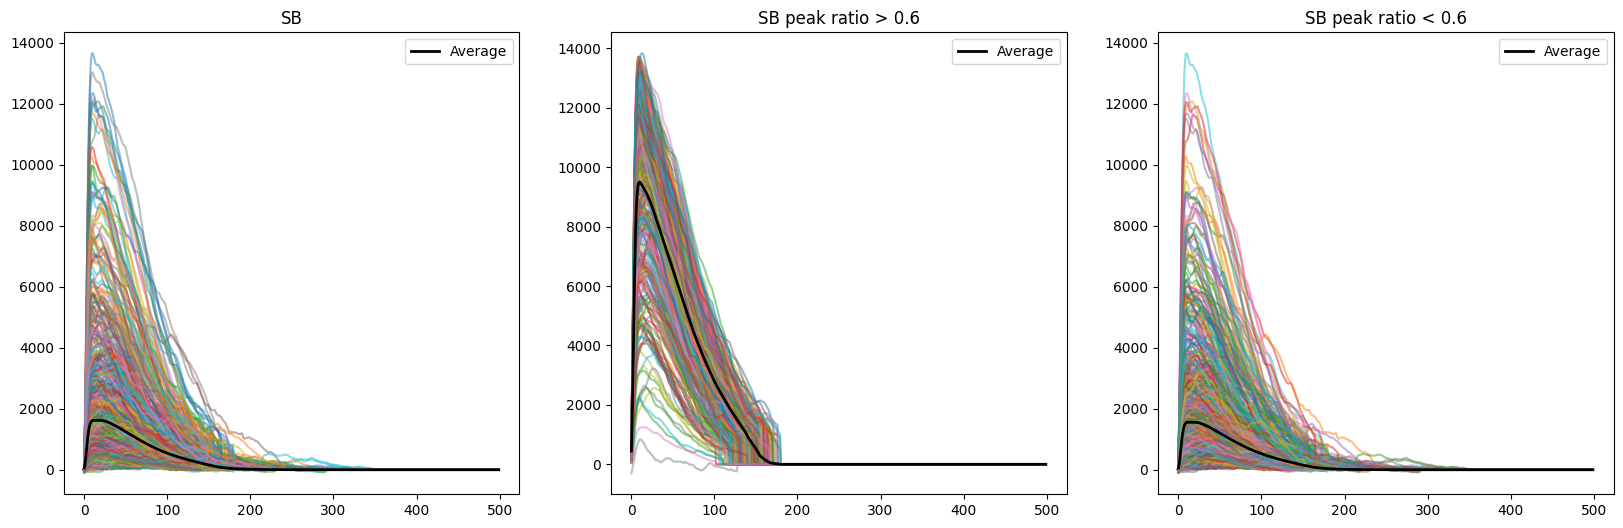

In [45]:
plot_peak_ratios(PNS_SB, peak_ratio=0.6, sample_name='SB')

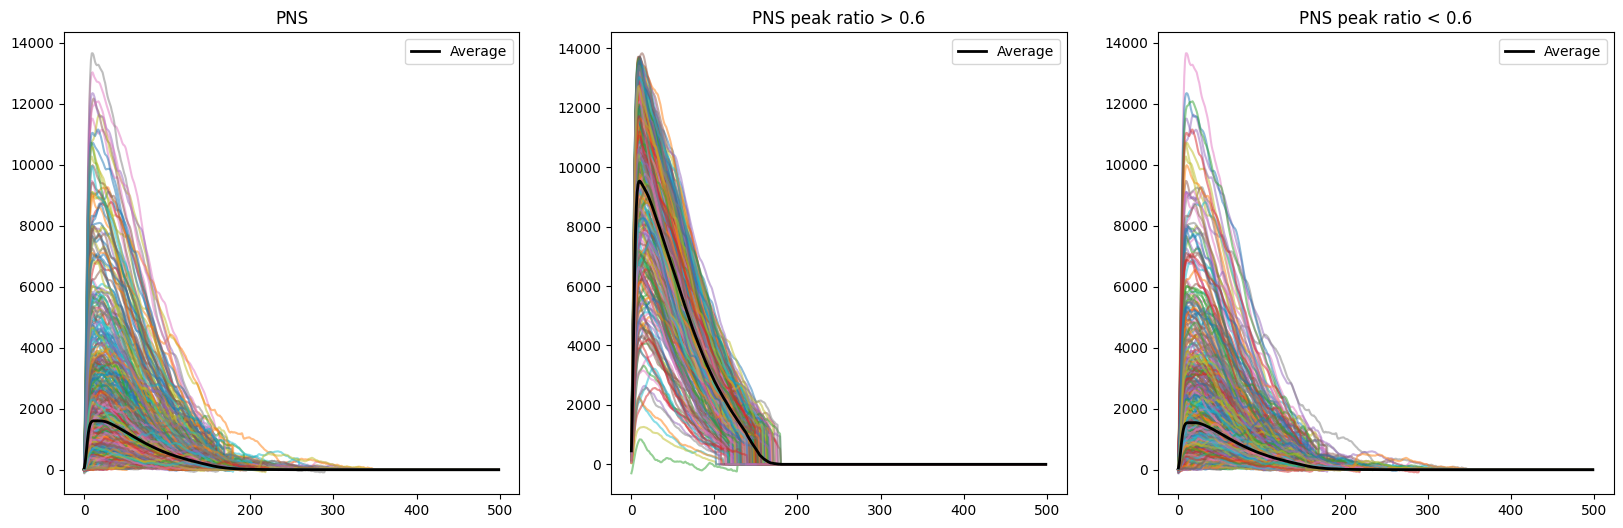

In [44]:
plot_peak_ratios(PNS, peak_ratio=0.6, sample_name='PNS')

In [56]:
PNS_neutrons.peak_ratio.describe()

count    3780.000000
mean        0.146520
std         0.093681
min         0.032481
25%         0.092387
50%         0.120613
75%         0.165661
max         1.000000
Name: peak_ratio, dtype: float64

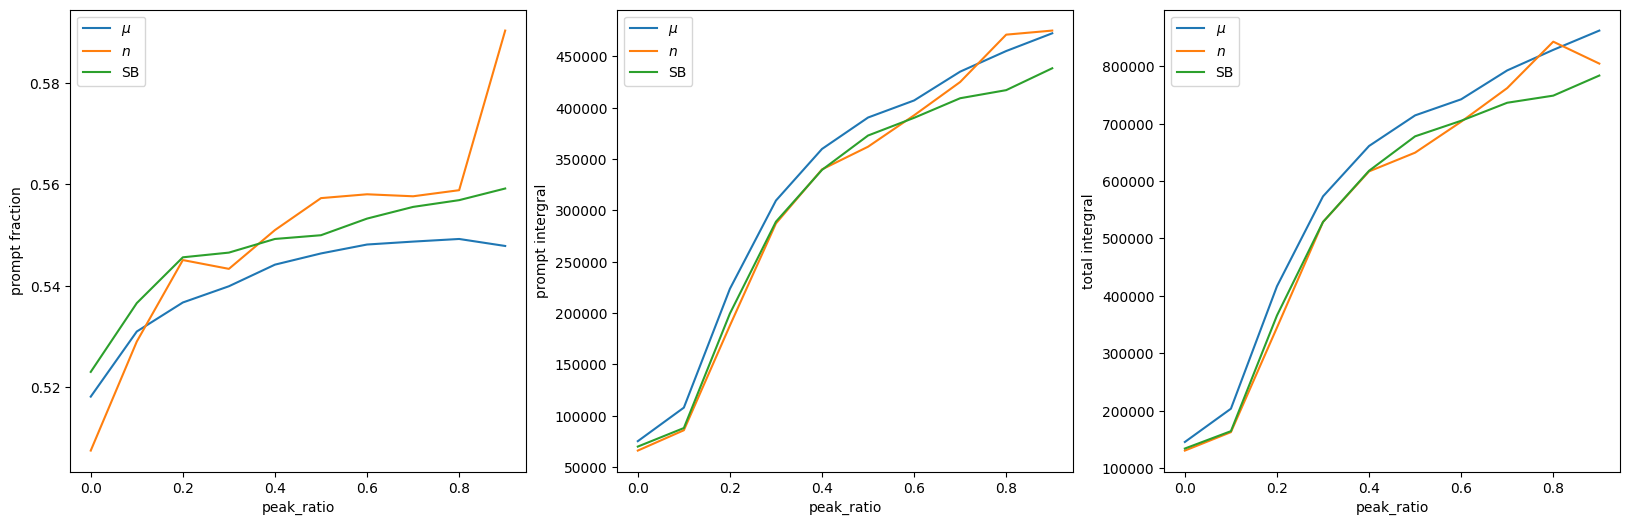

In [57]:
peak_ratios = np.arange(0, 1, 0.1)

promptLim = 50

mu, n = {'pF': [], 'totI': [], 'promptI': [], 'peak_ratio': []}, {'pF': [], 'totI': [], 'promptI': [], 'peak_ratio': []}
sb, pns = {'pF': [], 'totI': [], 'promptI': [], 'peak_ratio': []}, {'pF': [], 'totI': [], 'promptI': [], 'peak_ratio': []}

for peak_ratio in peak_ratios:
    mu_avg = np.mean(cosmics.query(f'peak_ratio>{peak_ratio}')['waveform_padded'], axis=0)
    n_avg  = np.mean(PNS_neutrons.query(f'peak_ratio>{peak_ratio}')['waveform_padded'], axis=0)
    sb_avg = np.mean(PNS_SB.query(f'peak_ratio>{peak_ratio}')['waveform_padded'], axis=0)
    # pns_avg = np.mean(PNS.query(f'peak_ratio>{peak_ratio}')['waveform_padded'], axis=0)

    mu_pF, mu_totI, mu_promptI = promptFrac(mu_avg, promptLim, Start=0)
    n_pF, n_totI, n_promptI = promptFrac(n_avg, promptLim, Start=0)
    sb_pF, sb_totI, sb_promptI = promptFrac(sb_avg, promptLim, Start=0)
    # pns_pF, pns_totI, pns_promptI = promptFrac(pns_avg, promptLim, Start=0)

    mu['pF'].append(mu_pF)
    mu['totI'].append(mu_totI)
    mu['promptI'].append(mu_promptI)
    mu['peak_ratio'].append(peak_ratio)

    n['pF'].append(n_pF)
    n['totI'].append(n_totI)
    n['promptI'].append(n_promptI)
    n['peak_ratio'].append(peak_ratio)

    sb['pF'].append(sb_pF)
    sb['totI'].append(sb_totI)
    sb['promptI'].append(sb_promptI)
    sb['peak_ratio'].append(peak_ratio)

    pns['pF'].append(pns_pF)
    pns['totI'].append(pns_totI)
    pns['promptI'].append(pns_promptI)
    pns['peak_ratio'].append(peak_ratio)

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
i = 0
for var in ['pF', 'promptI', 'totI']:
    ax = axs.flatten()[i]
    ax.plot(mu['peak_ratio'],    mu[var], label = r'$\mu$') 
    ax.plot(n['peak_ratio'],      n[var], label = r'$n$') 
    ax.plot(sb['peak_ratio'],    sb[var], label = r'SB')
    # ax.plot(pns['peak_ratio'],  pns[var], label = r'PNS') 
    ax.set_xlabel(r"peak_ratio")
    if var=='pF': ax.set_ylabel(r"prompt fraction");
    if var=='promptI': ax.set_ylabel(r"prompt intergral");
    if var=='totI': ax.set_ylabel(r"total intergral");
    ax.legend();
    i+=1